## 0. Loading Data and Libraries

In [58]:
# IMPORTING AND LOADING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import sklearn
import xgboost as xgb
import scipy.stats as stats

from sklearn.model_selection import StratifiedKFold, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_log_error, make_scorer, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [59]:
# LOADING DATASET


df = pd.read_csv('/Users/abhishek/Downloads/train.csv')
test_df = pd.read_csv('/Users/abhishek/Downloads/test.csv')
df_og = pd.read_csv('/Users/abhishek/Downloads/kindey stone urine analysis.csv')
dff = test_df
test_df = test_df.drop(['id'], axis=1)

In [60]:
# VIEWING THE COLUMNS IN THE DATASET

df.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [61]:
df.shape

(414, 8)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,414.0,206.500000,119.655756,0.000,103.250,206.500,309.750,413.00
gravity,414.0,1.017894,0.006675,1.005,1.012,1.018,1.022,1.04
ph,414.0,5.955459,0.642260,4.760,5.530,5.740,6.280,7.94
osmo,414.0,651.545894,234.676567,187.000,455.250,679.500,840.000,1236.00
cond,414.0,21.437923,7.514750,5.100,15.500,22.200,27.600,38.00
urea,414.0,278.657005,136.442249,10.000,170.000,277.000,385.000,620.00
calc,414.0,4.114638,3.217641,0.170,1.450,3.130,6.630,14.34
target,414.0,0.444444,0.497505,0.000,0.000,0.000,1.000,1.00


In [63]:
#Checking missing values

df.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [64]:
# LOOKING FOR DUPLICATES

df.loc[df.duplicated()]

,id,gravity,ph,osmo,cond,urea,calc,target


In [65]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


## 1. EDA and Visualisation

In [66]:
columns_bp = list(df.columns)
columns_bp.remove('id')
columns_bp.remove('target')

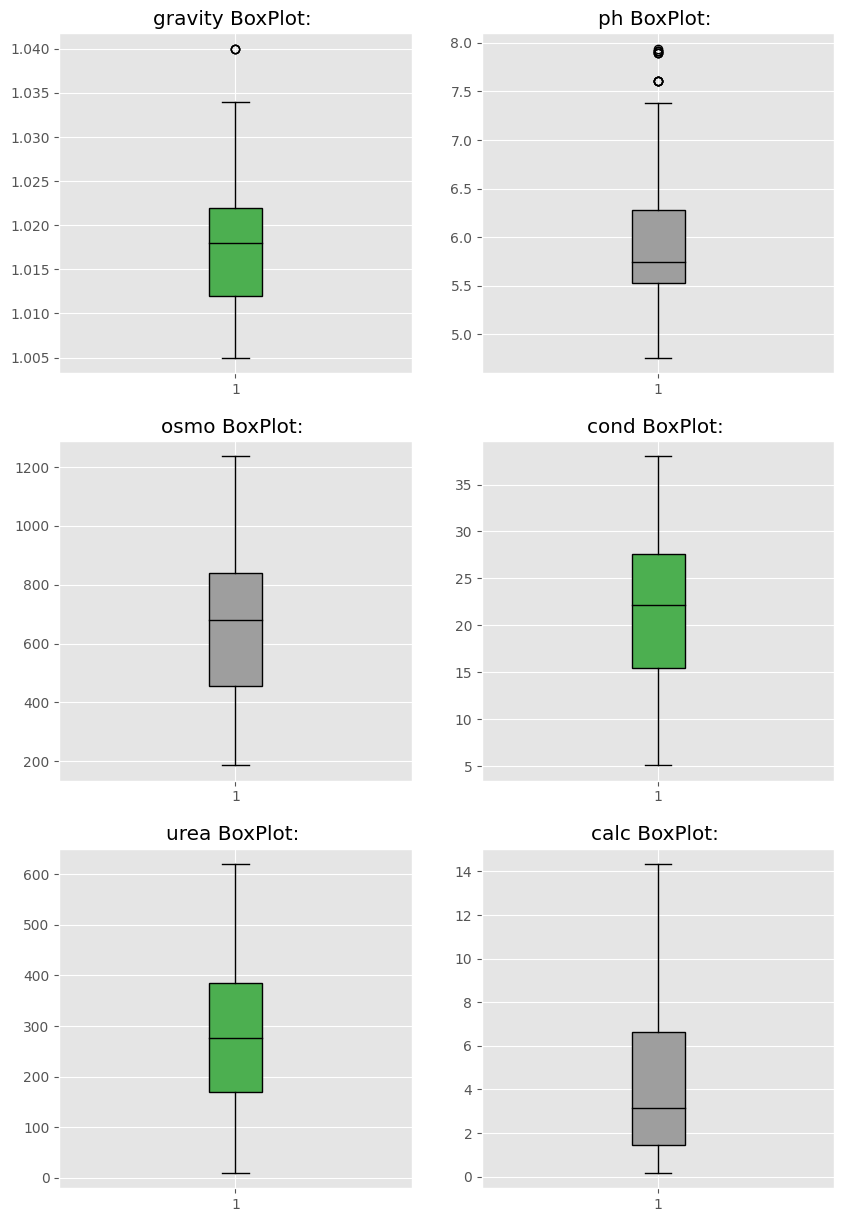

In [67]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
colors = ['#4CAF50','#9E9E9E', '#9E9E9E', '#4CAF50', '#4CAF50','#9E9E9E','#9E9E9E', '#4CAF50']

for i, ax in enumerate(axs.flatten()):
    col_name = columns_bp[i]
    color = colors[i]
    bp = ax.boxplot(df[col_name], patch_artist=True, medianprops=dict(color='black'))
    for patch in bp['boxes']:
        patch.set_facecolor(color)
    ax.set_title(f'{col_name} BoxPlot: ')

plt.show()

In [68]:
columns = list(df.columns)

columns.remove('id')

cat = 0
num = 0

for i in range(7):
    if df[columns[i]].nunique() <= 10:
        cat+=1
        
    else:
        num+=1
        
print('No. of Numerical Variables:', num)
print('No. of Categorical Variables:', cat)

No. of Numerical Variables: 6
No. of Categorical Variables: 1


In [69]:
num_df = pd.DataFrame()

for col in df.columns:
    if df[col].nunique() > 10:
        num_df[col] = df[col]
        
num_df = num_df.drop('id', axis=1)

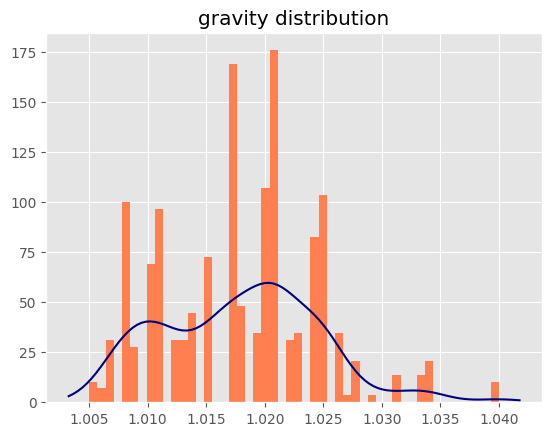

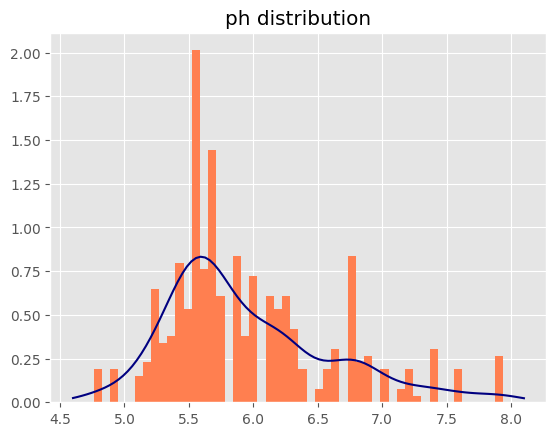

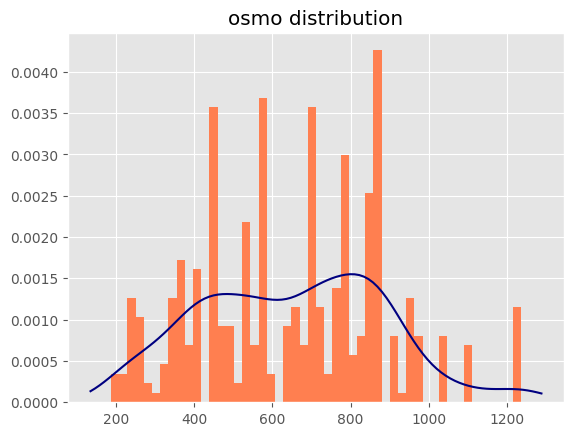

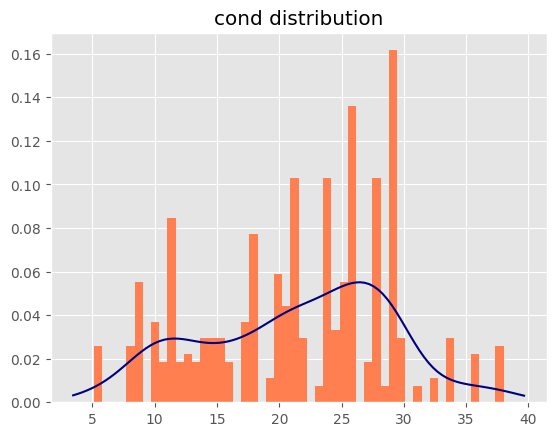

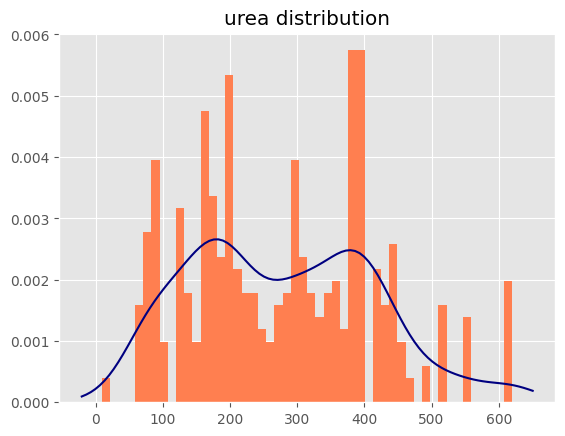

In [70]:
columns_num = list(num_df.columns)


for i in range(5):
    fig_num, ax2 = plt.subplots()
    ax2.hist(num_df[columns_num[i]], bins=50, density=True, color='coral')
    ax2.set_title(f'{columns_num[i]} distribution')
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    kde = stats.gaussian_kde(num_df[columns_num[i]])
    ax2.plot(x, kde(x), color='navy')
    plt.show()

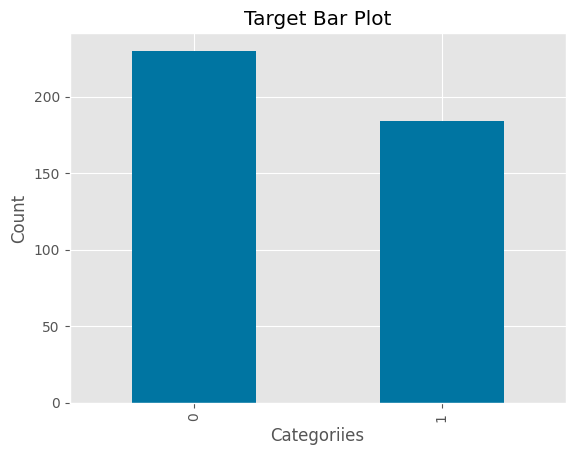

In [71]:
df['target'].value_counts().plot(kind='bar', color = '#0075A2')

plt.xlabel('Categoriies')
plt.ylabel('Count')
plt.title('Target Bar Plot')

plt.show()

In [72]:
import dtale

In [23]:
dtale.show(df)

In [73]:
# calc is skewed so needs transformation?

df['log_calc'] = np.log(df['calc'])

(array([ 5.,  2.,  5., 17., 96., 44., 67., 70., 80., 28.]),
 array([-1.77195684e+00, -1.32845587e+00, -8.84954907e-01, -4.41453939e-01,
         2.04702891e-03,  4.45547997e-01,  8.89048964e-01,  1.33254993e+00,
         1.77605090e+00,  2.21955187e+00,  2.66305284e+00]),
 <BarContainer object of 10 artists>)

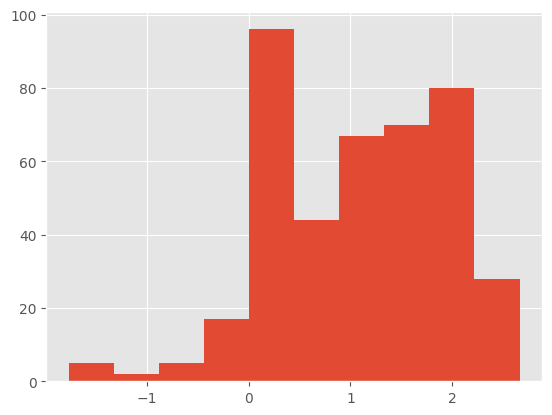

In [74]:
plt.hist(df['log_calc'])


In [75]:
df = df.drop(['log_calc'], axis = 1)

In [76]:
dtale.show(df)

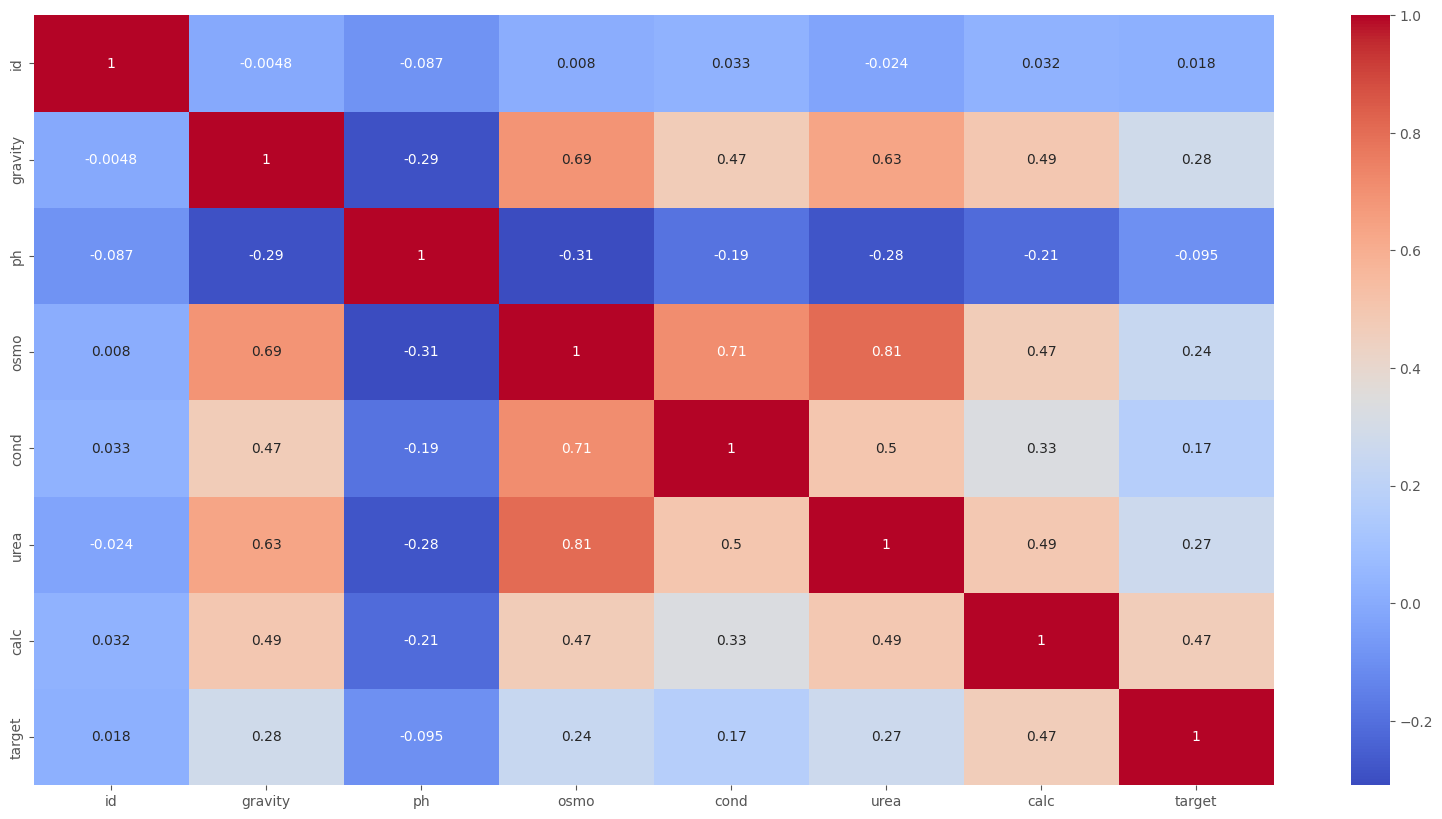

In [77]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## 2. Feature Selection and Engineering

In [78]:
df = df.drop('id', axis=1)

In [79]:
df_merged = pd.concat([df, df_og], ignore_index=True, sort=False)

In [93]:
df_merged['cond/osmo'] = df_merged['cond']/df_merged['osmo']
df_merged['calc/ph'] = df_merged['calc']/df_merged['ph']

In [104]:
test_df['cond/osmo'] = test_df['cond']/test_df['osmo']
test_df['calc/ph'] = test_df['calc']/test_df['ph']

## 3. Model building and Assessment

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df_merged.drop(['target'], axis=1), df_merged['target'], test_size=0.2, random_state=42)

In [107]:
X_train.isna().sum()

gravity      0
ph           0
osmo         0
cond         0
urea         0
calc         0
cond/osmo    0
calc/ph      0
dtype: int64

In [108]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth = 3,
                            random_state=42)


In [109]:
xgb_cl = xgb.XGBClassifier(n_estimators = 100, 
                          learning_rate = 0.05, 
                          max_depth = 1,
                          eval_metric = "auc")

In [136]:
voting_classifier = VotingClassifier(estimators=[('rf', rf), ('xgb_cl', xgb_cl)], voting = 'soft',weights=[1, 4] )

In [137]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=42)),
                             ('xgb_cl',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=1,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft', weights=[1, 4])

In [138]:
voting_auc = roc_auc_score(y_test, voting_classifier.predict_proba(X_test)[:, 1])
print(f"Voting Classifier ROC AUC score: {voting_auc:.2f}")

Voting Classifier ROC AUC score: 0.87


2023-04-17 17:47:28,246 - INFO     - Executing shutdown due to inactivity...
2023-04-17 17:47:28,324 - INFO     - Executing shutdown...
2023-04-17 17:47:28,325 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_serv

In [115]:
voting_classifier.fit(df_merged.drop(['target'], axis=1), df_merged['target'])

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=42)),
                             ('xgb_cl',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=1,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [116]:
predictions = voting_classifier.predict_proba(test_df)[:, 1]

In [117]:
submission = pd.DataFrame({'id': dff['id'], 'target': predictions})
submission.to_csv('kidneystonepred8.csv', index=False)

In [230]:
fpr, tpr, thresholds = roc_curve(y_test, voting_classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, voting_classifier.predict_proba(X_test)[:, 1])


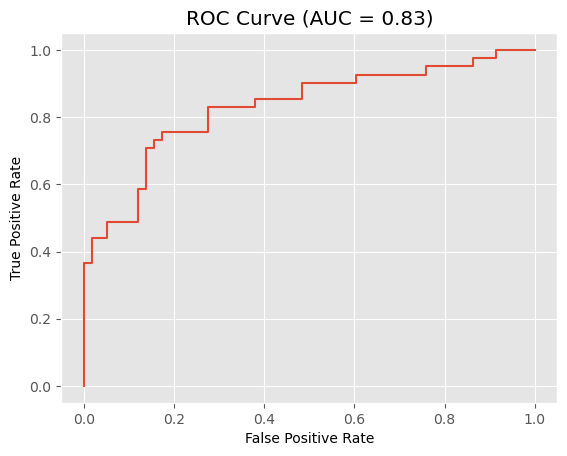

AUC Score: 0.83


In [231]:
# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()

# print AUC score
print('AUC Score: {:.2f}'.format(roc_auc))